In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.float_format', '{:.10f}'.format)

In [43]:
df = pd.read_csv("Students_Grading_Dataset.csv")
df

Student_ID First_Name Last_Name                       Email  Gender  Age  \
0         S1000       Omar  Williams     student0@university.com  Female   22   
1         S1001      Maria     Brown     student1@university.com    Male   18   
2         S1002      Ahmed     Jones     student2@university.com    Male   24   
3         S1003       Omar  Williams     student3@university.com  Female   24   
4         S1004       John     Smith     student4@university.com  Female   23   
...         ...        ...       ...                         ...     ...  ...   
4995      S5995      Ahmed     Jones  student4995@university.com    Male   19   
4996      S5996       Emma     Brown  student4996@university.com    Male   19   
4997      S5997       John     Brown  student4997@university.com  Female   24   
4998      S5998       Sara     Davis  student4998@university.com    Male   23   
4999      S5999      Maria     Brown  student4999@university.com  Female   21   

       Department  Attendance (%)  Midterm_Score   Final_Score  ...  \
0     Mathematics   97.3600000000  40.6100000000 59.6100000000  ...   
1        Business   97.7100000000  57.2700000000 74.0000000000  ...   
2     Engineering   99.5200000000  41.8400000000 63.8500000000  ...   
3     Engineering   90.3800000000  45.6500000000 44.4400000000  ...   
4              CS   59.4100000000  53.1300000000 61.7700000000  ...   
...           ...             ...            ...           ...  ...   
4995           CS   96.0900000000  45.8600000000 45.6300000000  ...   
4996  Mathematics   96.3000000000  78.6700000000 47.4200000000  ...   
4997           CS   89.9400000000  50.8400000000 65.8300000000  ...   
4998  Engineering   99.0900000000  55.4400000000 57.4500000000  ...   
4999  Mathematics   90.3300000000  93.2900000000 88.4200000000  ...   

      Projects_Score   Total_Score  Grade  Study_Hours_per_Week  \
0      62.8400000000 83.4900000000      C         10.3000000000   
1      98.2300000000 92.2900000000      F         27.1000000000   
2      91.2200000000 93.5500000000      F         12.4000000000   
3      55.4800000000 51.0300000000      A         25.5000000000   
4      87.4300000000 90.9100000000      A         13.3000000000   
...              ...           ...    ...                   ...   
4995   51.6600000000 83.6000000000      A          7.8000000000   
4996   52.3300000000 50.6000000000      C         24.2000000000   
4997   97.8900000000 90.3200000000      D          7.6000000000   
4998   84.7400000000 77.3500000000      A         14.5000000000   
4999   66.2300000000 78.3200000000      D         29.9000000000   

      Extracurricular_Activities Internet_Access_at_Home  \
0                            Yes                      No   
1                             No                      No   
2                            Yes                      No   
3                             No                     Yes   
4                            Yes                      No   
...                          ...                     ...   
4995                          No                      No   
4996                          No                     Yes   
4997                          No                     Yes   
4998                         Yes                      No   
4999                         Yes                     Yes   

      Parent_Education_Level Family_Income_Level Stress_Level (1-10)  \
0                   Master's              Medium                   1   
1                High School                 Low                   4   
2                High School                 Low                   9   
3                High School                 Low                   8   
4                   Master's              Medium                   6   
...                      ...                 ...                 ...   
4995                Master's              Medium                  10   
4996                     NaN              Medium                   4   
4997 

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

# Preprocesamiento

In [45]:
df["Department"].unique()

array(['Mathematics', 'Business', 'Engineering', 'CS'], dtype=object)

In [46]:
df["Grade"].unique()

array(['C', 'F', 'A', 'D', 'B'], dtype=object)

In [47]:
df["Family_Income_Level"].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [48]:
df["Parent_Education_Level"].unique()

array(["Master's", 'High School', nan, "Bachelor's", 'PhD'], dtype=object)

In [49]:
df['Parent_Education_Level'] = df['Parent_Education_Level'].fillna('Unknown')
df['Internet_Access_at_Home'] = df['Internet_Access_at_Home'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Department'] = df['Department'].map({'Mathematics': 0, 'Business': 1, 'Engineering': 2, 'CS': 3})
df['Grade'] = df['Grade'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'F': 4, })
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})
df['Family_Income_Level'] = df['Family_Income_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Parent_Education_Level'] = df['Parent_Education_Level'].map({'High School': 0, 'Bachelor\'s': 1, 'Master\'s': 2, 'PhD': 3, 'Unknown': 4})

<Axes: xlabel='Stress_Level (1-10)', ylabel='Count'>

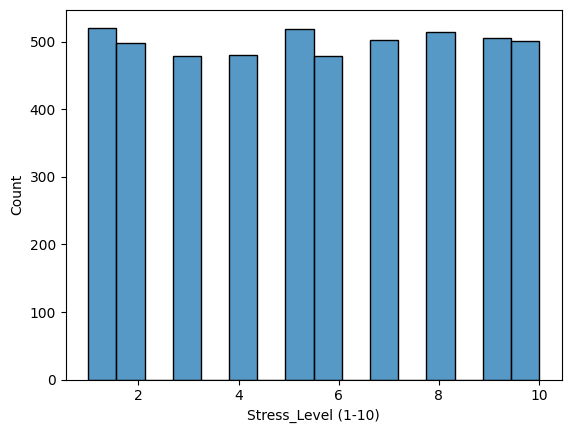

In [50]:
sns.histplot(df["Stress_Level (1-10)"])

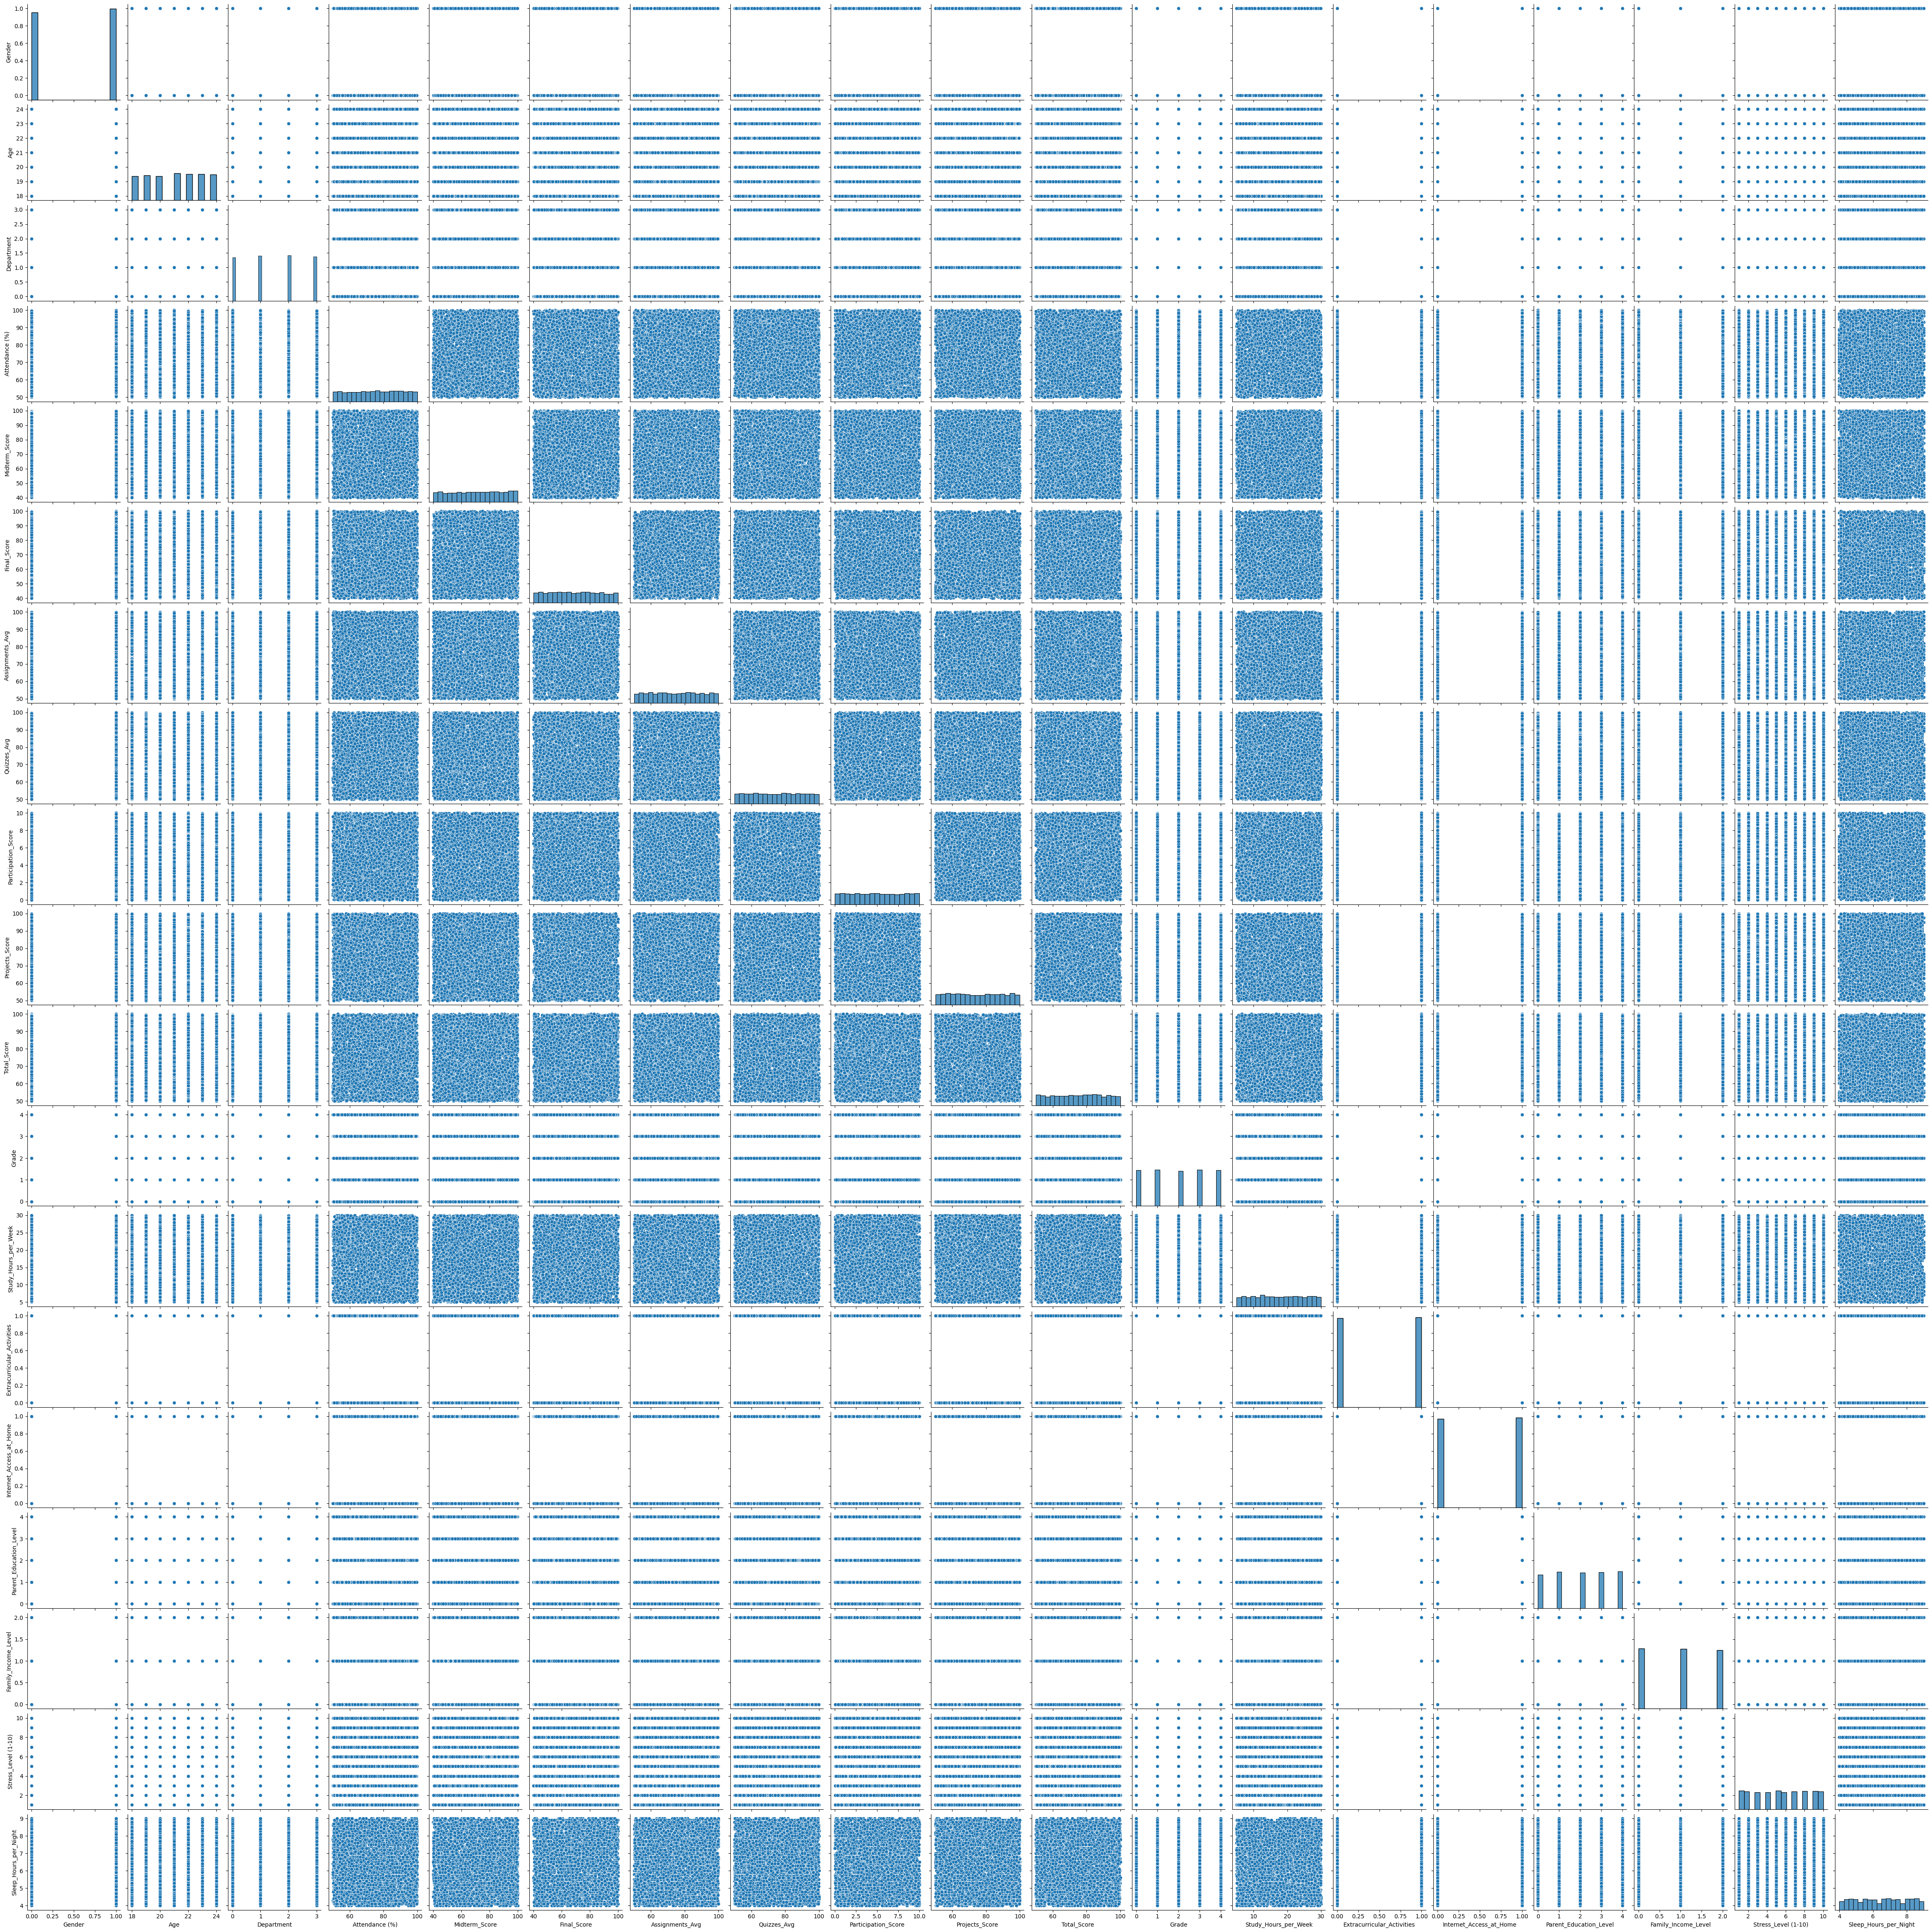

In [51]:
sns.pairplot(df)

In [52]:
df.isnull().sum()

Student_ID                    0
First_Name                    0
Last_Name                     0
Email                         0
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64

In [53]:
df

Student_ID First_Name Last_Name                       Email  Gender  Age  \
0         S1000       Omar  Williams     student0@university.com       0   22   
1         S1001      Maria     Brown     student1@university.com       1   18   
2         S1002      Ahmed     Jones     student2@university.com       1   24   
3         S1003       Omar  Williams     student3@university.com       0   24   
4         S1004       John     Smith     student4@university.com       0   23   
...         ...        ...       ...                         ...     ...  ...   
4995      S5995      Ahmed     Jones  student4995@university.com       1   19   
4996      S5996       Emma     Brown  student4996@university.com       1   19   
4997      S5997       John     Brown  student4997@university.com       0   24   
4998      S5998       Sara     Davis  student4998@university.com       1   23   
4999      S5999      Maria     Brown  student4999@university.com       0   21   

      Department  Attendance (%)  Midterm_Score   Final_Score  ...  \
0              0   97.3600000000  40.6100000000 59.6100000000  ...   
1              1   97.7100000000  57.2700000000 74.0000000000  ...   
2              2   99.5200000000  41.8400000000 63.8500000000  ...   
3              2   90.3800000000  45.6500000000 44.4400000000  ...   
4              3   59.4100000000  53.1300000000 61.7700000000  ...   
...          ...             ...            ...           ...  ...   
4995           3   96.0900000000  45.8600000000 45.6300000000  ...   
4996           0   96.3000000000  78.6700000000 47.4200000000  ...   
4997           3   89.9400000000  50.8400000000 65.8300000000  ...   
4998           2   99.0900000000  55.4400000000 57.4500000000  ...   
4999           0   90.3300000000  93.2900000000 88.4200000000  ...   

      Projects_Score   Total_Score  Grade  Study_Hours_per_Week  \
0      62.8400000000 83.4900000000      2         10.3000000000   
1      98.2300000000 92.2900000000      4         27.1000000000   
2      91.2200000000 93.5500000000      4         12.4000000000   
3      55.4800000000 51.0300000000      0         25.5000000000   
4      87.4300000000 90.9100000000      0         13.3000000000   
...              ...           ...    ...                   ...   
4995   51.6600000000 83.6000000000      0          7.8000000000   
4996   52.3300000000 50.6000000000      2         24.2000000000   
4997   97.8900000000 90.3200000000      3          7.6000000000   
4998   84.7400000000 77.3500000000      0         14.5000000000   
4999   66.2300000000 78.3200000000      3         29.9000000000   

      Extracurricular_Activities  Internet_Access_at_Home  \
0                              1                        0   
1                              0                        0   
2                              1                        0   
3                              0                        1   
4                              1                        0   
...                          ...                      ...   
4995                           0                        0   
4996                           0                        1   
4997                           0                        1   
4998                           1                        0   
4999                           1                        1   

      Parent_Education_Level  Family_Income_Level  Stress_Level (1-10)  \
0                          2                    1                    1   
1                          0                    0                    4   
2                          0                    0                    9   
3                          0                    0                    8   
4                          2                    1                    6   
...                      ...                  ...                  ...   
4995                       2                    1                   10   
4996                       4                    1            

In [57]:
from sklearn.model_selection import train_test_split

X = df[["Gender", "Age", "Department", "Family_Income_Level", "Extracurricular_Activities", "Internet_Access_at_Home", "Attendance (%)", "Sleep_Hours_per_Night", "Study_Hours_per_Week", "Total_Score", "Projects_Score", "Participation_Score", "Quizzes_Avg", "Assignments_Avg", "Final_Score", "Midterm_Score", "Parent_Education_Level"]]
y = df["Stress_Level (1-10)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [59]:
print("Random Forest R²:", model_rf.score(X_train, y_train))

Random Forest R²: 0.8560655757599125


In [60]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [61]:
print("Regresion linear R²:", model_lr.score(X_train, y_train))

Regresion linear R²: 0.006469716887308574


In [94]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(
    random_state=42
)
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [95]:
print("Arbol de decision R²:", model_dt.score(X_train, y_train))

Arbol de decision R²: 1.0


In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model_dt.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 3.320666666666667
RMSE: 4.113149644736986
